In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
from sklearn.datasets import load_wine

In [3]:
df = load_wine()

In [4]:
df.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [5]:
print(df['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

## Exploratory Data Analysis

In [6]:
df.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [7]:
features = pd.DataFrame(df['data'], columns=['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline'])
features.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [50]:
df.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [52]:
df['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [55]:
target = pd.DataFrame(df['target'], columns = ['class'])
target.sample(10)

,class
148,2
9,0
93,1
30,0
48,0
166,2
58,0
37,0
126,1
8,0


array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [8]:
np.shape(features)  #178 samples/bottles of wine and 13 features

(178, 13)

In [9]:
# fig, ax = plt.subplots(figsize=(50,50))
# sns.pairplot(features)

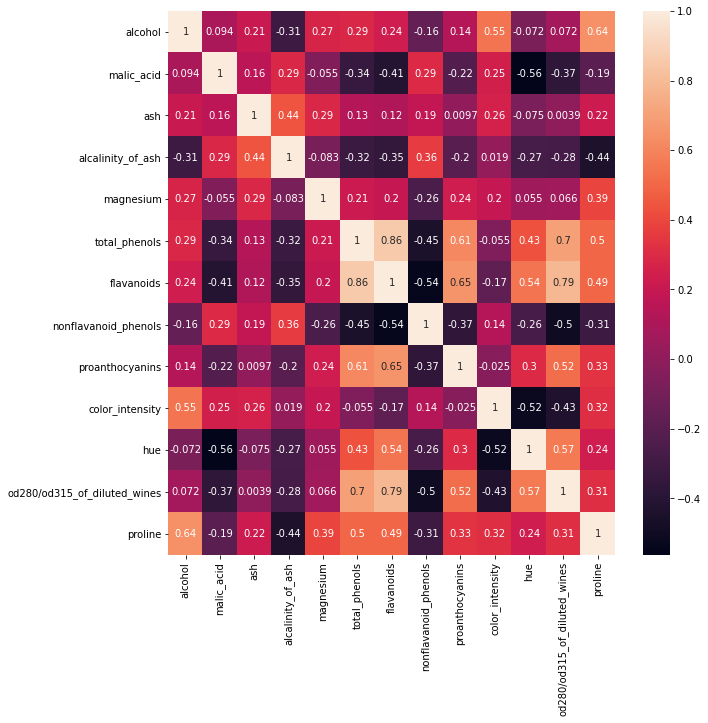

In [10]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(features.corr(), annot=True)

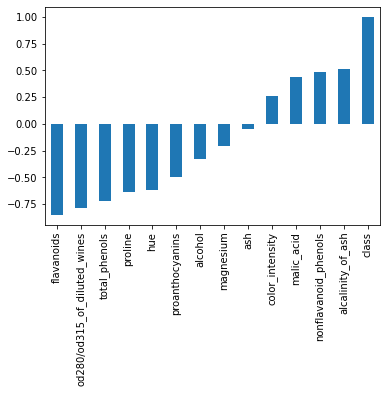

In [68]:
df2 = pd.merge(target,features,left_index=True, right_index=True)
df2.corr()['class'].sort_values().plot(kind='bar')  #shows what features strongly and negatively correlate with the labels.

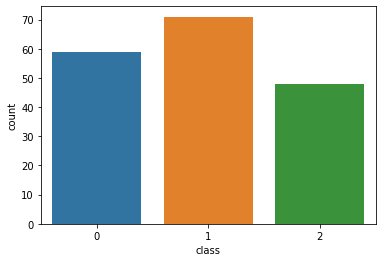

In [57]:
sns.countplot(x='class', data=target)

## Split dataset into training and test sets

In [11]:
# Features:  Note, must be in a np array.  
#If pandas DataFrame, use [[]].values to select multiple features/columns and to convert to np array.
X = df.data

In [12]:
#Target
y = df.target

In [13]:
np.unique(y)  #Note 3 labels to predict

array([0, 1, 2])

In [69]:
#Split data into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [70]:
print(X.shape)
print(y.shape)
print('-------')
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(178, 13)
(178,)
-------
(133, 13)
(45, 13)
(133,)
(45,)


## Normalize/Scale data.  
Super important for nueral networks since you are working with weights and biases inside the network.  Large values in feature set could cause large errors.  Also vanishing and exploding gradients could cause issues.  Don't really need to scale target/labels as only the features are being passed through the network.

In [71]:
scaler = MinMaxScaler()  #other types of scaling also. MinMaxScaler is dependent on stand dev, min value, and max value of dataset.

In [72]:
#Fit only on training set in order to avoid 'data leakage' onto test set (ie. don't want to assume we have prior info of the test set).
scaler.fit(X_train)  #Fit essentially calculates the st. dev., min and max

MinMaxScaler(copy=True, feature_range=(0, 1))

In [73]:
X_train = scaler.transform(X_train)
print(X_train.min())
print(X_train.max())

0.0
1.0


In [74]:
X_train #Note everything is now bw 0 and 1.

array([[0.79341317, 0.17588933, 0.49197861, ..., 0.62886598, 0.89377289,
        0.35805991],
       [0.67664671, 0.10079051, 0.29946524, ..., 0.77319588, 0.43589744,
        0.2510699 ],
       [0.43413174, 0.12055336, 0.51336898, ..., 0.28865979, 0.00732601,
        0.2510699 ],
       ...,
       [0.62874251, 0.20948617, 0.68983957, ..., 0.63917526, 0.58608059,
        0.58273894],
       [0.7245509 , 0.1798419 , 0.6631016 , ..., 0.78350515, 0.76923077,
        0.70399429],
       [1.        , 0.19565217, 0.55080214, ..., 0.79381443, 0.53479853,
        0.62196862]])

In [75]:
X_test = scaler.transform(X_test)  #have to do this too. 

## Build nueral network using Tensorflow

In [76]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout  
#Regular densely-connected NN layer (i.e. normal feed forward network where every nueron in a layer is connected to every nueron in the next layer)

In [77]:
X_train.shape

(133, 13)

In [179]:
model = Sequential()

model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='relu'))  #final output neuron layer.  Set to 1 since only one value expected as output. 
#'relu' in all layers except output.  Can be used for regression and classification.
#'sigmoid' for binary classification. Sigmoid squeezes output to either 0 or 1.
#'softmax" for probability or multi-label (i.e. wine could come from both wineries 1 and 2)

model.compile(optimizer='adam', loss='mse')  #adam optimizer also an option
#'categorical_crossentropy' for multiclass classification 
#'binary_crossentropy' for binary classification
#'mse','rmse', or 'mae' for regression

#https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/
#https://towardsdatascience.com/multi-label-image-classification-in-tensorflow-2-0-7d4cf8a4bc72
#https://androidkt.com/multi-label-text-classification-in-tensorflow-keras/

In [180]:
model.fit(x=X_train, y=y_train, epochs=250, validation_data=(X_test, y_test), verbose=0)  #can add callback so you can choose super large epoch and it will auto stop it once it fits well.

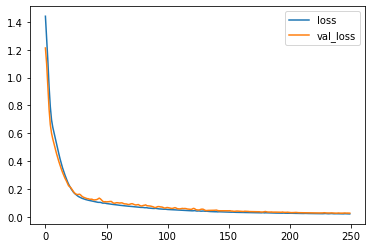

In [181]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [182]:
loss_df

,loss,val_loss
0,1.440857,1.212758
1,1.283985,1.099375
2,1.119729,0.930869
3,0.933422,0.772373
4,0.791193,0.662012
...,...,...
245,0.022325,0.027585
246,0.021725,0.026565
247,0.021504,0.026916
248,0.021361,0.026371


## Evaluate model.  
How will it evaluate on test data?

In [183]:
#This is the mean square error on the test set
print(model.evaluate(X_test,y_test,verbose=0))
#This is the mean square error on the training set
print(model.evaluate(X_train,y_train,verbose=0))

0.026345370337367058
0.020814789459109306


#### Use model to predict the label base off of the features of the test set.  Then compare the predictions to the actual test labels.

In [185]:
test_predictions = model.predict(X_test)

# test_predictions = pd.Series(test_predictions.reshape)
pred_df = pd.DataFrame(y_test, columns = ['True Test Y'])
print(pred_df.shape)
print(test_predictions.shape)

pred_df2 = pd.concat([pd.DataFrame(y_test), pd.DataFrame(test_predictions)], axis=1)
pred_df2.columns = ['Test True Y', 'Model Predictions']
pred_df2

(45, 1)
(45, 1)


,Test True Y,Model Predictions
0,2,2.248746
1,2,1.730134
2,1,1.058004
3,0,0.000000
4,1,0.606124
5,1,0.843037
6,2,2.048259
7,1,1.085623
8,0,0.000000
9,0,0.174084


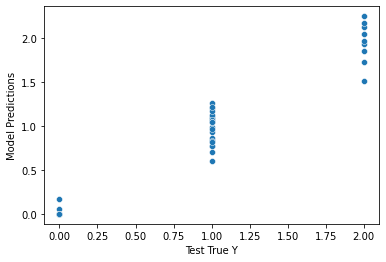

In [187]:
sns.scatterplot(x='Test True Y', y = 'Model Predictions', data=pred_df2)

In [188]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [189]:
mean_absolute_error(pred_df2['Test True Y'], pred_df2['Model Predictions'])

0.11587238377994961

In [190]:
mean_squared_error(pred_df2['Test True Y'], pred_df2['Model Predictions'])

0.02634537019155384